In [1]:
import gpxpy

import pandas as pd

import matplotlib

from pytz import timezone

from utils import (
    init_postgis, 
    get_location_error, 
    crop_route, 
    get_total_distance,
    get_gpx_df,
    plot_map,
    plot_location_error,
    plot_elevation,
)

In [2]:
matplotlib.rcParams['timezone'] = 'Asia/Hanoi'

In [3]:
input_dir = f"../hanoi/times-city"

In [4]:
init_postgis('gpx_route', input_dir + '/route.gpx')

init_postgis('glonass', input_dir + '/glonass.gpx')
init_postgis('galileo', input_dir + '/galileo.gpx')
init_postgis('qzss', input_dir + '/qzss.gpx')

init_postgis('pixel', input_dir + '/pixel.gpx')

In [5]:
glonass_df = get_location_error('glonass')
glonass_df.head(3)

time        lat         lon  distance_to_route
0 2024-09-06 22:32:02.979000+08:00  20.993562  105.866767          44.467205
1 2024-09-06 22:32:03.980000+08:00  20.993562  105.866767          44.467205
2 2024-09-06 22:32:04.981000+08:00  20.993513  105.866730          38.709969

In [6]:
galileo_df = get_location_error('galileo')
galileo_df = galileo_df.iloc[70:]
galileo_df.head(3)

time        lat         lon  distance_to_route
70 2024-09-05 22:14:52.028000+08:00  20.996623  105.867710          29.388346
71 2024-09-05 22:14:53.029000+08:00  20.996608  105.867512           7.310351
72 2024-09-05 22:14:54.029000+08:00  20.996600  105.867320          14.026256

In [7]:
qzss_df = get_location_error('qzss')
qzss_df = qzss_df.iloc[70:]
qzss_df.head(3)

time        lat         lon  distance_to_route
70 2024-09-14 07:18:36.663000+08:00  20.995768  105.867572          13.989520
71 2024-09-14 07:18:37.663000+08:00  20.995795  105.867575          14.360214
72 2024-09-14 07:18:38.663000+08:00  20.995822  105.867580          14.916812

In [8]:
pixel_df = get_location_error('pixel')
pixel_df.head(3)

time        lat         lon  distance_to_route
0 2024-09-14 07:17:24+08:00  20.994363  105.867414           3.531196
1 2024-09-14 07:17:25+08:00  20.994385  105.867404           4.703779
2 2024-09-14 07:17:26+08:00  20.994403  105.867386           5.967868

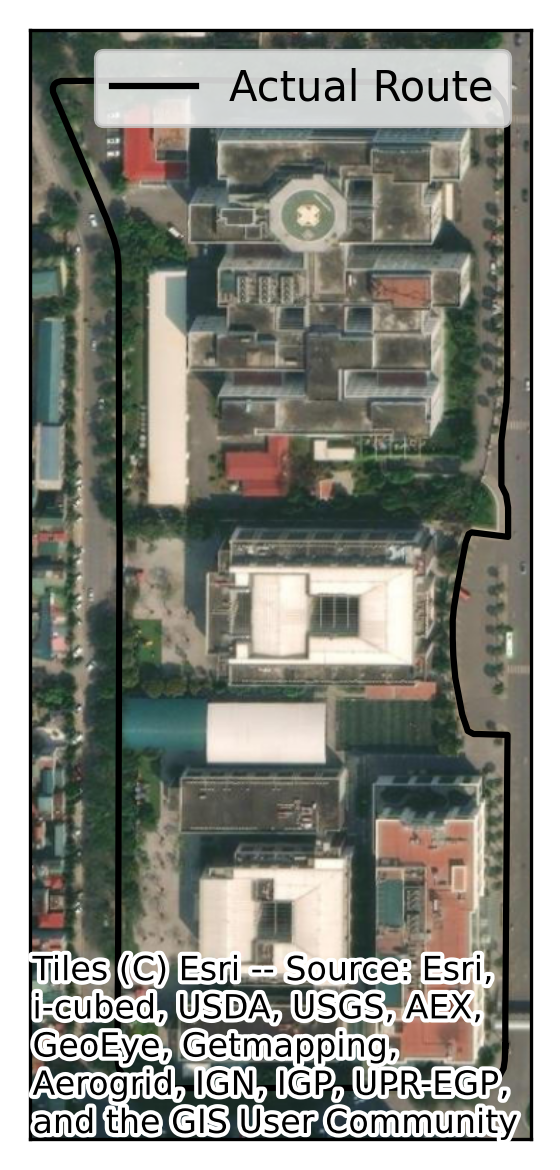

In [9]:
route_df = get_gpx_df(input_dir + '/route.gpx')
plot_map(route_df, 'black', 'Actual Route')

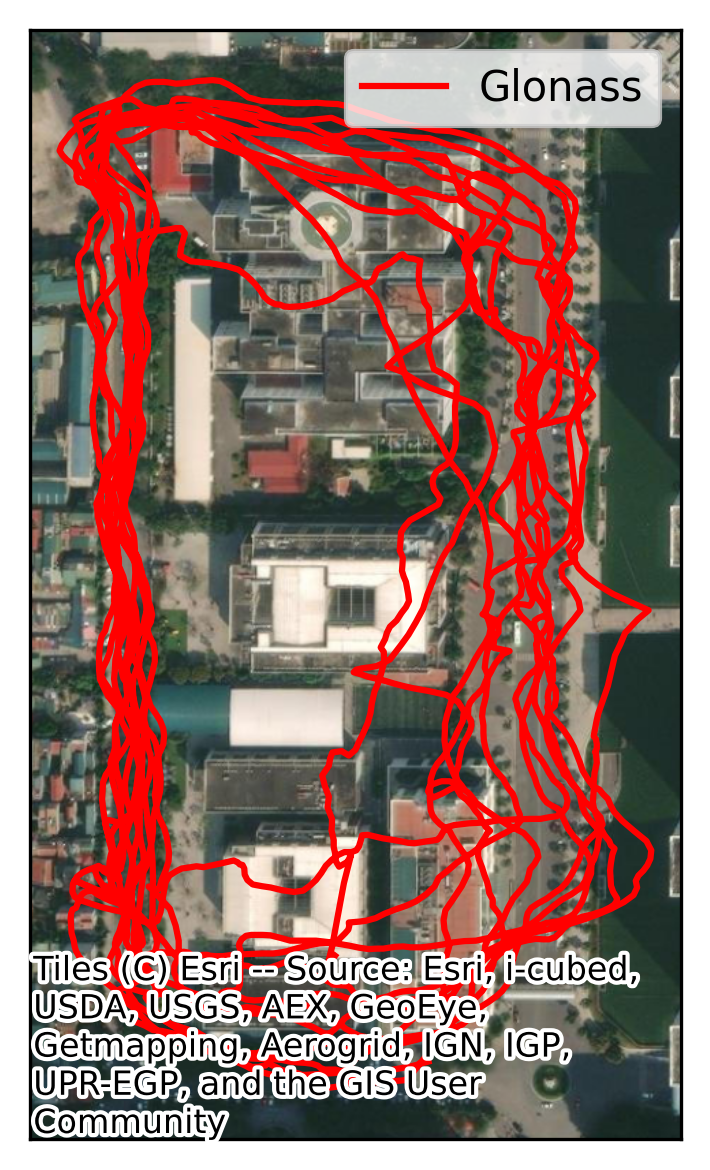

In [10]:
plot_map(glonass_df, 'red', 'Glonass')

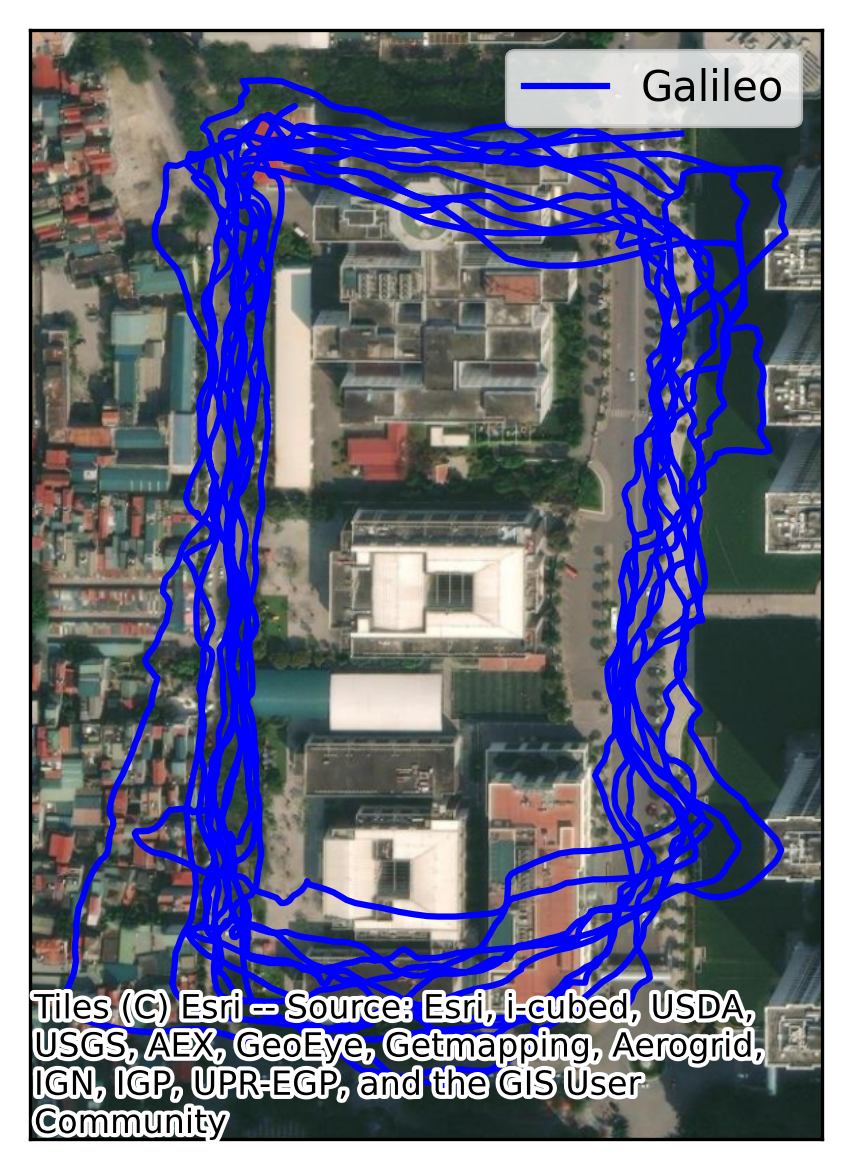

In [11]:
plot_map(galileo_df, 'blue', 'Galileo')

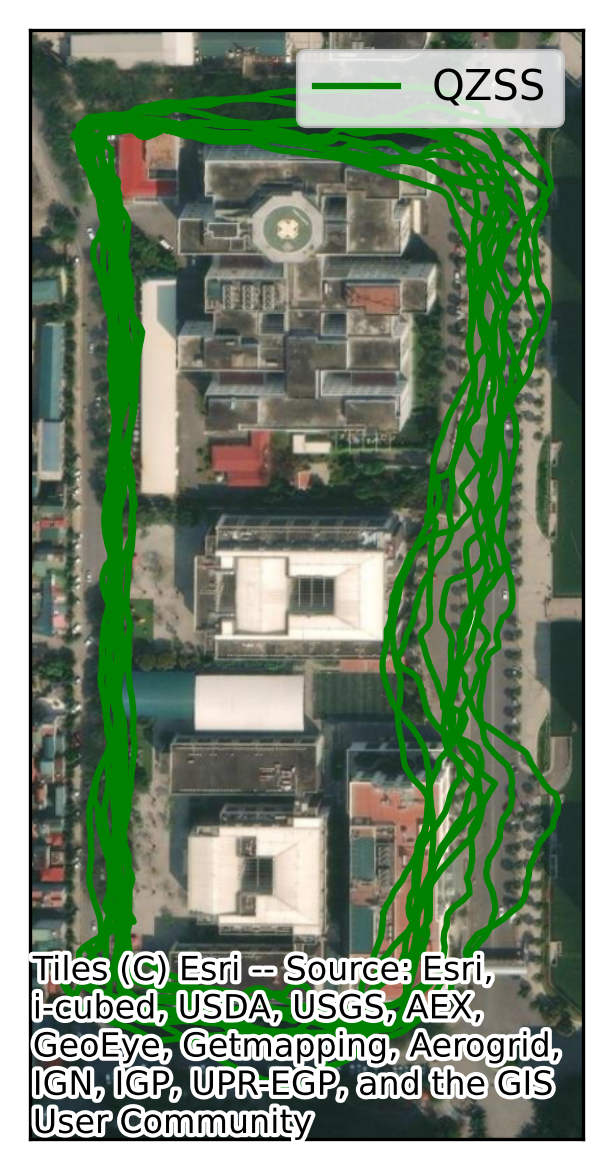

In [12]:
plot_map(qzss_df, 'green', 'QZSS')

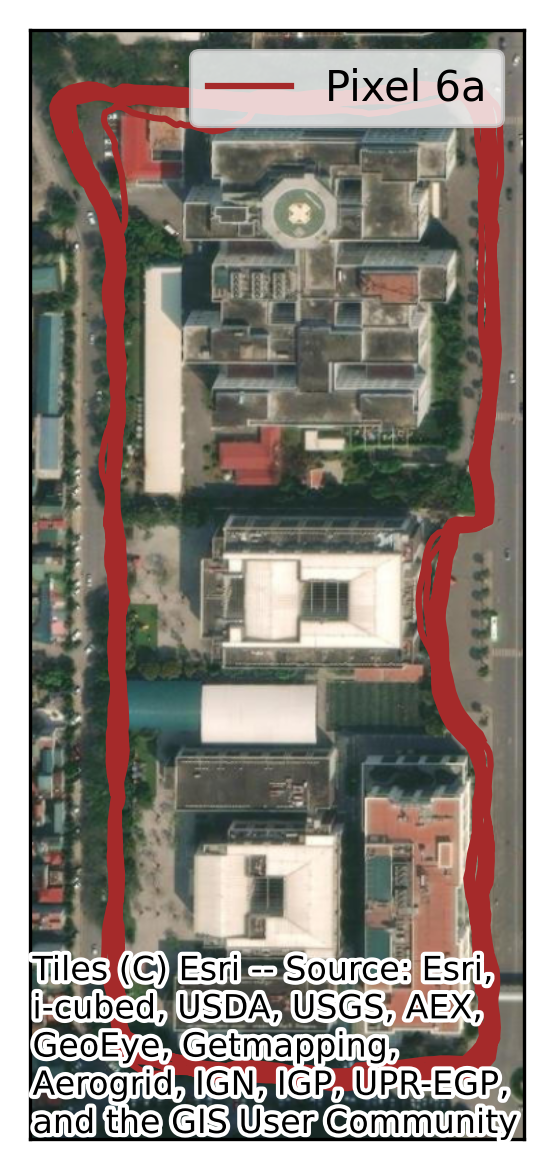

In [13]:
plot_map(pixel_df, 'brown', 'Pixel 6a')

In [14]:
desc_glonass_df = glonass_df['distance_to_route'].describe().to_frame()
desc_glonass_df.columns = ['Glonass']

desc_galileo_df = galileo_df['distance_to_route'].describe().to_frame()
desc_galileo_df.columns = ['Galileo']

desc_qzss_df = qzss_df['distance_to_route'].describe().to_frame()
desc_qzss_df.columns = ['QZSS']

desc_pixel_df = pixel_df['distance_to_route'].describe().to_frame()
desc_pixel_df.columns = ['Pixel']

merged_desc = pd.concat([desc_glonass_df, desc_galileo_df, desc_qzss_df, desc_pixel_df], axis=1)
merged_desc.to_csv('/tmp/merged_desc.csv')

print(merged_desc)

           Glonass      Galileo         QZSS        Pixel
count  3713.000000  3692.000000  4036.000000  4108.000000
mean     16.002708    19.498791     8.732475     3.219521
std      13.729468    15.344603     7.605923     3.094087
min       0.001369     0.012103     0.005108     0.000224
25%       6.197156     7.001671     2.712557     0.916403
50%      12.041425    16.315116     6.796049     2.144713
75%      22.108045    28.340166    12.348120     4.537116
max      76.839131    76.332005    40.214645    21.291841
